In [34]:
import keras
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.utils import to_categorical

In [35]:
#import the data
from keras.datasets import mnist

In [36]:
#read the data
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [37]:
print(X_train[0])
X_train.shape[0]

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

60000

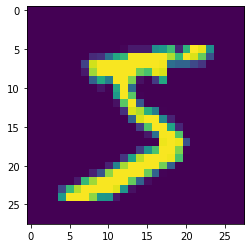

In [38]:
plt.imshow(X_train[0])

In [39]:
#flatten image into one dimentional vector
num_pixels = X_train.shape[1]*X_train.shape[2] #find size of one dimentional vector
X_train = X_train.reshape(X_train.shape[0],num_pixels).astype('float32') # flatten training images
X_test = X_test.reshape(X_test.shape[0],num_pixels).astype('float32') # flatten training images
print(X_train[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

In [40]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [41]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [93]:
# define classification model
def classification_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels,)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [94]:
# build the model
model = classification_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/10
1875/1875 - 11s - loss: 0.1872 - accuracy: 0.9425 - val_loss: 0.0881 - val_accuracy: 0.9708
Epoch 2/10
1875/1875 - 10s - loss: 0.0778 - accuracy: 0.9753 - val_loss: 0.0885 - val_accuracy: 0.9738
Epoch 3/10
1875/1875 - 9s - loss: 0.0542 - accuracy: 0.9828 - val_loss: 0.0806 - val_accuracy: 0.9747
Epoch 4/10
1875/1875 - 10s - loss: 0.0409 - accuracy: 0.9864 - val_loss: 0.0760 - val_accuracy: 0.9783
Epoch 5/10
1875/1875 - 18s - loss: 0.0300 - accuracy: 0.9903 - val_loss: 0.0823 - val_accuracy: 0.9776
Epoch 6/10
1875/1875 - 10s - loss: 0.0252 - accuracy: 0.9922 - val_loss: 0.0727 - val_accuracy: 0.9807
Epoch 7/10
1875/1875 - 10s - loss: 0.0216 - accuracy: 0.9931 - val_loss: 0.0906 - val_accuracy: 0.9776
Epoch 8/10
1875/1875 - 10s - loss: 0.0195 - accuracy: 0.9935 - val_loss: 0.0927 - val_accuracy: 0.9800
Epoch 9/10
1875/1875 - 10s - loss: 0.0162 - accuracy: 0.9948 - val_loss: 0.1070 - val_accuracy: 0.9743
Epoch 10/10
1875/1875 - 10s - loss: 0.0165 - accuracy: 0.9948 - val_loss: 

In [95]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))

Accuracy: 0.9832000136375427% 
 Error: 0.016799986362457275


In [96]:
model.save('classification_model.h5')

In [97]:
from keras.models import load_model
pretrained_model = load_model('classification_model.h5') #to load the exiting model